In [1]:
import numpy as np
import defs
import appynho

In [2]:
litho_types = defs.read_litho_types('../data/lito_code.csv')

In [3]:
well_28D = defs.read_well('../data/7-MP-28D-BA.las', ['DEPTH', 'GR', 'Lith_new'])
well_31D = defs.read_well('../data/7-MP-56D-BA.las', ['DEPTH', 'GR', 'Lith_new'])

In [4]:
top = 2500.0
base = 3100.0

In [5]:
formation_28D = defs.formation_zone(well_28D, top, base)
formation_31D = defs.formation_zone(well_31D, top, base)

In [6]:
separate_28D = defs.separate_lithology(formation_28D, litho_types, ['Lith_new', 'GR'])
separate_31D = defs.separate_lithology(formation_31D, litho_types, ['Lith_new', 'GR'])

In [7]:
step = 10.0
overlap = 0.2

In [8]:
statistic_28D = defs.statistic_lithology(separate_28D, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR'], step, top, base, overlap)

C:\Users\rmota\OneDrive\Documentos\PFG_2020\PFG_2020\codes\defs.py:393: RuntimeWarning: Mean of empty slice
  m = np.nanmean(curve_save[w])
c:\users\rmota\.conda\envs\tcc2\lib\site-packages\numpy\lib\nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [9]:
def sort_curve(data, statistic, litho_types, curve, step, top=False, bottom=False):
    
    import copy
    
    if top:
        top = top
    else:
        top = min(data['DEPTH'])

    if bottom:
        bottom = bottom
    else:
        bottom = max(data['DEPTH'])
    
    gr = np.full(len(data['DEPTH']), np.nan)
    
    
    for (i, depth) in enumerate(data['DEPTH']):
        for lith in litho_types:
            tops = copy.deepcopy(statistic[lith][curve]['Mean']['Top'])
            bases = copy.deepcopy(statistic[lith][curve]['Mean']['Base'])
            mean = copy.deepcopy(statistic[lith][curve]['Mean']['Value'])
            std = copy.deepcopy(statistic[lith][curve]['Std']['Value'])
            if (depth >= top) & (depth <= bottom) & (data['Lith_new'][i] == int(litho_types[lith]['CODE'])):
                d = list(abs(depth-tops)+abs(depth-bases))
                index = d.index(min(d))
                while (np.isnan(mean[index])) and (len(d) > 1):
                    d.pop(index)
                    mean.pop(index)
                    std.pop(index)
                    index = d.index(min(d))
                value = np.random.normal(mean[index], std[index])
                gr[i] = value
    
    return np.array(gr)

In [10]:
gr_sort_31D = sort_curve(separate_31D, statistic_28D, litho_types, 'GR', step, top, base)

In [11]:
gr_sort_31D

array([87.53443133, 87.47366619, 90.16127669, ..., 42.0894885 ,
       41.64089712, 42.75787094])

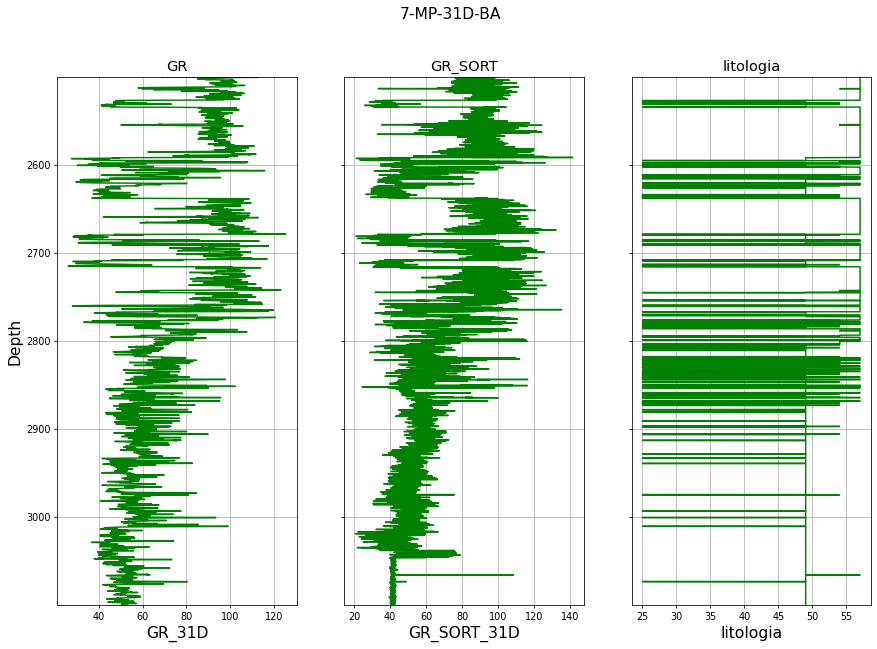

In [12]:
grafico = appynho.plotagem(3, titulo = '7-MP-31D-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_31D['GR'], separate_31D['DEPTH'], cor = 'g', descricao_x = 'GR_31D', descricao_y = 'Depth', titulo = 'GR')
grafico.plot_s(1, gr_sort_31D, separate_31D['DEPTH'], cor = 'g', descricao_x = 'GR_SORT_31D', descricao_y = 'Depth', titulo = 'GR_SORT')
grafico.plot_s(2, separate_31D['Lith_new'], separate_31D['DEPTH'], cor = 'g', descricao_x = 'litologia', descricao_y = 'Depth', titulo = 'litologia')

In [13]:
a = [2, 3, 5, 1 , 2]

In [14]:
b = sorted(a)

In [15]:
print(b)

[1, 2, 2, 3, 5]
